## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.3, 0.5, 0.7]
redice_lr_patient = [3, 5, 10]

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.30, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 1s 15us/step - loss: 1.3090 - acc: 0.5450 - val_loss: 1.5093 - val_acc: 0.4619
Epoch 12/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.2855 - acc: 0.5535 - val_loss: 1.4842 - val_acc: 0.4783
Epoch 13/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.2622 - acc: 0.5618 - val_loss: 1.4867 - val_acc: 0.4750
Epoch 14/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.2424 - acc: 0.5708 - val_loss: 1.4894 - val_acc: 0.4745
Epoch 15/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.2216 - acc: 0.5762 - val_loss: 1.4609 - val_acc: 0.4842
Epoch 16/25
50000/50000 [==============================] - 1s 15us/step - loss: 1.2010 - acc: 0.5855 - val_loss: 1.4593 - val_acc: 0.4827
Epoch 17/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.1816 - acc: 0.5919 - val_loss: 1.4675 - val_acc: 0.4807
Epoch 18/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 2s 34us/step - loss: 2.5177 - acc: 0.2006 - val_loss: 2.3148 - val_acc: 0.2643
Epoch 2/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.9909 - acc: 0.3209 - val_loss: 2.0333 - val_acc: 0.3223
Epoch 3/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.8466 - acc: 0.3583 - val_loss: 1.8957 - val_acc: 0.3541
Epoch 4/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.7672 - acc: 0.3826 - val_loss: 1.8169 - val_acc: 0.3689
Epoch 5/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.7112 - acc: 0.4018 - val_loss: 1.7653 - val_acc: 0.3926
Epoch 6/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.6676 - acc: 0.4167 - val_loss: 1.7260 - val_acc: 0.3983
Epoch 7/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.6308 - acc: 0.4279 - val_loss: 1.7037 - val_acc

50000/50000 [==============================] - 1s 17us/step - loss: 1.3449 - acc: 0.5353 - val_loss: 1.5357 - val_acc: 0.4667
Epoch 25/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.3342 - acc: 0.5386 - val_loss: 1.5271 - val_acc: 0.4669
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.5026 - acc: 0.4753 - val_loss: 1.6307 - val_acc: 0.4324
Epoch 13/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.4842 - acc: 0.4829 - val_loss: 1.6203 - val_acc: 0.4344
Epoch 14/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.4672 - acc: 0.4895 - val_loss: 1.6048 - val_acc: 0.4449
Epoch 15/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.4517 - acc: 0.4930 - val_loss: 1.5963 - val_acc: 0.4454
Epoch 16/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.4367 - acc: 0.5000 - val_loss: 1.5928 - val_acc: 0.4469
Epoch 17/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.4214 - acc: 0.5059 - val_loss: 1.5808 - val_acc: 0.4504
Epoch 18/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.4082 - acc: 0.5082 - val_loss: 1.5717 - val_acc: 0.4514
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 2s 43us/step - loss: 2.4629 - acc: 0.2148 - val_loss: 2.3370 - val_acc: 0.2592
Epoch 2/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.9964 - acc: 0.3244 - val_loss: 2.0272 - val_acc: 0.3325
Epoch 3/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.8457 - acc: 0.3641 - val_loss: 1.9105 - val_acc: 0.3536
Epoch 4/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.7619 - acc: 0.3879 - val_loss: 1.8197 - val_acc: 0.3776
Epoch 5/25
50000/50000 [==============================] - 1s 16us/step - loss: 1.7049 - acc: 0.4072 - val_loss: 1.7667 - val_acc: 0.3890
Epoch 6/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.6606 - acc: 0.4191 - val_loss: 1.7262 - val_acc: 0.3991
Epoch 7/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.6247 - acc: 0.4318 - val_loss: 1.6990 - val_acc

50000/50000 [==============================] - 1s 18us/step - loss: 0.6613 - acc: 0.7905 - val_loss: 1.3581 - val_acc: 0.5417
Epoch 23/25
50000/50000 [==============================] - 1s 17us/step - loss: 0.6599 - acc: 0.7920 - val_loss: 1.3593 - val_acc: 0.5417
Epoch 24/25
50000/50000 [==============================] - 1s 18us/step - loss: 0.6599 - acc: 0.7920 - val_loss: 1.3609 - val_acc: 0.5397

Epoch 00024: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
Epoch 25/25
50000/50000 [==============================] - 1s 17us/step - loss: 0.6558 - acc: 0.7939 - val_loss: 1.3615 - val_acc: 0.5403
Numbers of exp: 10, reduce_factor: 0.30, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               7

50000/50000 [==============================] - 1s 17us/step - loss: 1.9161 - acc: 0.3419 - val_loss: 1.9473 - val_acc: 0.3363
Epoch 10/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.8959 - acc: 0.3478 - val_loss: 1.9289 - val_acc: 0.3423
Epoch 11/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.8768 - acc: 0.3551 - val_loss: 1.9159 - val_acc: 0.3463
Epoch 12/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.8604 - acc: 0.3596 - val_loss: 1.9030 - val_acc: 0.3497
Epoch 13/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.8458 - acc: 0.3637 - val_loss: 1.8907 - val_acc: 0.3550
Epoch 14/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.8320 - acc: 0.3666 - val_loss: 1.8794 - val_acc: 0.3584
Epoch 15/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.8183 - acc: 0.3709 - val_loss: 1.8689 - val_acc: 0.3612
Epoch 16/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 61us/step - loss: 2.6069 - acc: 0.1857 - val_loss: 2.4852 - val_acc: 0.2313
Epoch 2/25
50000/50000 [==============================] - 1s 17us/step - loss: 2.2567 - acc: 0.2581 - val_loss: 2.2511 - val_acc: 0.2617
Epoch 3/25
50000/50000 [==============================] - 1s 17us/step - loss: 2.1386 - acc: 0.2873 - val_loss: 2.1496 - val_acc: 0.2763
Epoch 4/25
50000/50000 [==============================] - 1s 17us/step - loss: 2.0709 - acc: 0.3022 - val_loss: 2.0895 - val_acc: 0.2899
Epoch 5/25
50000/50000 [==============================] - 1s 17us/step - loss: 2.0224 - acc: 0.3150 - val_loss: 2.0434 - val_acc: 0.3011
Epoch 6/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.9838 - acc: 0.3259 - val_loss: 2.0111 - val_acc: 0.3100
Epoch 7/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.9549 - acc: 0.3338 - val_loss: 1.9867 - val_acc

50000/50000 [==============================] - 1s 18us/step - loss: 1.7013 - acc: 0.4084 - val_loss: 1.7810 - val_acc: 0.3894
Epoch 25/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.6940 - acc: 0.4096 - val_loss: 1.7744 - val_acc: 0.3908
Numbers of exp: 15, reduce_factor: 0.70, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.8413 - acc: 0.3681 - val_loss: 1.8978 - val_acc: 0.3538
Epoch 13/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.8271 - acc: 0.3724 - val_loss: 1.8856 - val_acc: 0.3578
Epoch 14/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.8137 - acc: 0.3743 - val_loss: 1.8763 - val_acc: 0.3582
Epoch 15/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.8023 - acc: 0.3798 - val_loss: 1.8649 - val_acc: 0.3616
Epoch 16/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.7898 - acc: 0.3838 - val_loss: 1.8556 - val_acc: 0.3644
Epoch 17/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.7800 - acc: 0.3859 - val_loss: 1.8465 - val_acc: 0.3657
Epoch 18/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.7698 - acc: 0.3894 - val_loss: 1.8385 - val_acc: 0.3684
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.8490 - acc: 0.3657 - val_loss: 2.1709 - val_acc: 0.2978
Epoch 2/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.5442 - acc: 0.4542 - val_loss: 2.3221 - val_acc: 0.2997
Epoch 3/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.4288 - acc: 0.4935 - val_loss: 2.5190 - val_acc: 0.2373
Epoch 4/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.3602 - acc: 0.5192 - val_loss: 1.8422 - val_acc: 0.3676
Epoch 5/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.2822 - acc: 0.5461 - val_loss: 2.0612 - val_acc: 0.3201
Epoch 6/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.2296 - acc: 0.5658 - val_loss: 1.7259 - val_acc: 0.4055
Epoch 7/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.1716 - acc: 0.5864 - val_loss: 2.0250 - val_acc

Epoch 22/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.5761 - acc: 0.4490 - val_loss: 1.6817 - val_acc: 0.4165
Epoch 23/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.5649 - acc: 0.4530 - val_loss: 1.6709 - val_acc: 0.4163
Epoch 24/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.5539 - acc: 0.4565 - val_loss: 1.6667 - val_acc: 0.4183
Epoch 25/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.5441 - acc: 0.4599 - val_loss: 1.6614 - val_acc: 0.4249
Numbers of exp: 20, reduce_factor: 0.30, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
__________________________________________________________

50000/50000 [==============================] - 1s 17us/step - loss: 1.8280 - acc: 0.3687 - val_loss: 1.8864 - val_acc: 0.3559
Epoch 10/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.7973 - acc: 0.3786 - val_loss: 1.8624 - val_acc: 0.3658
Epoch 11/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.7687 - acc: 0.3861 - val_loss: 1.8358 - val_acc: 0.3688
Epoch 12/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.7453 - acc: 0.3935 - val_loss: 1.8164 - val_acc: 0.3766
Epoch 13/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.7234 - acc: 0.4018 - val_loss: 1.8038 - val_acc: 0.3801
Epoch 14/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.7018 - acc: 0.4084 - val_loss: 1.7856 - val_acc: 0.3859
Epoch 15/25
50000/50000 [==============================] - 1s 17us/step - loss: 1.6829 - acc: 0.4137 - val_loss: 1.7705 - val_acc: 0.3901
Epoch 16/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 89us/step - loss: 2.7537 - acc: 0.1585 - val_loss: 2.5627 - val_acc: 0.1996
Epoch 2/25
50000/50000 [==============================] - 1s 18us/step - loss: 2.4141 - acc: 0.2193 - val_loss: 2.3596 - val_acc: 0.2412
Epoch 3/25
50000/50000 [==============================] - 1s 18us/step - loss: 2.2382 - acc: 0.2602 - val_loss: 2.2460 - val_acc: 0.2694
Epoch 4/25
50000/50000 [==============================] - 1s 19us/step - loss: 2.1243 - acc: 0.2903 - val_loss: 2.1527 - val_acc: 0.2908
Epoch 5/25
50000/50000 [==============================] - 1s 18us/step - loss: 2.0433 - acc: 0.3114 - val_loss: 2.0739 - val_acc: 0.3082
Epoch 6/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.9800 - acc: 0.3280 - val_loss: 2.0108 - val_acc: 0.3198
Epoch 7/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.9284 - acc: 0.3414 - val_loss: 1.9661 - val_acc

50000/50000 [==============================] - 1s 17us/step - loss: 1.5562 - acc: 0.4568 - val_loss: 1.6837 - val_acc: 0.4166
Epoch 25/25
50000/50000 [==============================] - 1s 18us/step - loss: 1.5459 - acc: 0.4610 - val_loss: 1.6745 - val_acc: 0.4176
Numbers of exp: 25, reduce_factor: 0.70, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_76 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 1s 21us/step - loss: 1.7453 - acc: 0.3932 - val_loss: 1.8127 - val_acc: 0.3735
Epoch 13/25
50000/50000 [==============================] - 1s 21us/step - loss: 1.7233 - acc: 0.4012 - val_loss: 1.7975 - val_acc: 0.3800
Epoch 14/25
50000/50000 [==============================] - 1s 20us/step - loss: 1.7020 - acc: 0.4080 - val_loss: 1.7832 - val_acc: 0.3841
Epoch 15/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.6840 - acc: 0.4132 - val_loss: 1.7667 - val_acc: 0.3893
Epoch 16/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.6665 - acc: 0.4193 - val_loss: 1.7556 - val_acc: 0.3915
Epoch 17/25
50000/50000 [==============================] - 1s 19us/step - loss: 1.6502 - acc: 0.4238 - val_loss: 1.7396 - val_acc: 0.3989
Epoch 18/25
50000/50000 [==============================] - 1s 20us/step - loss: 1.6349 - acc: 0.4304 - val_loss: 1.7304 - val_acc: 0.3988
Epoch 19/25
50000/50000 [=========

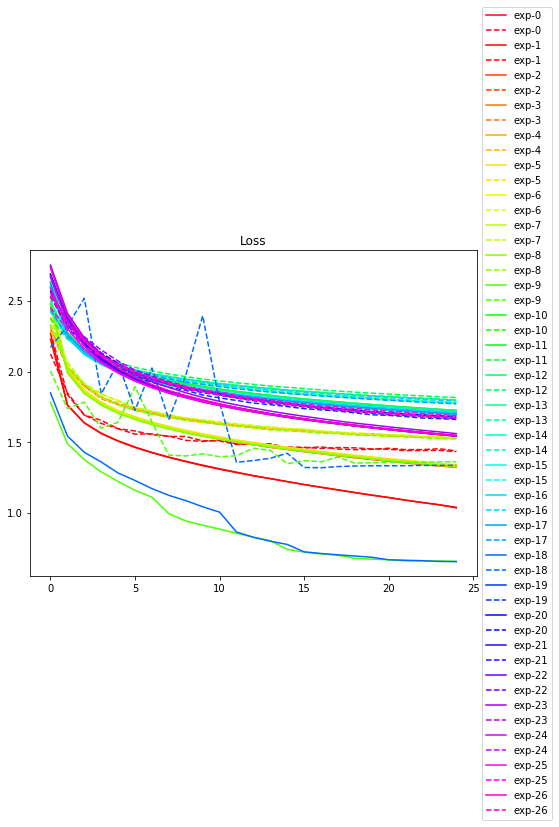

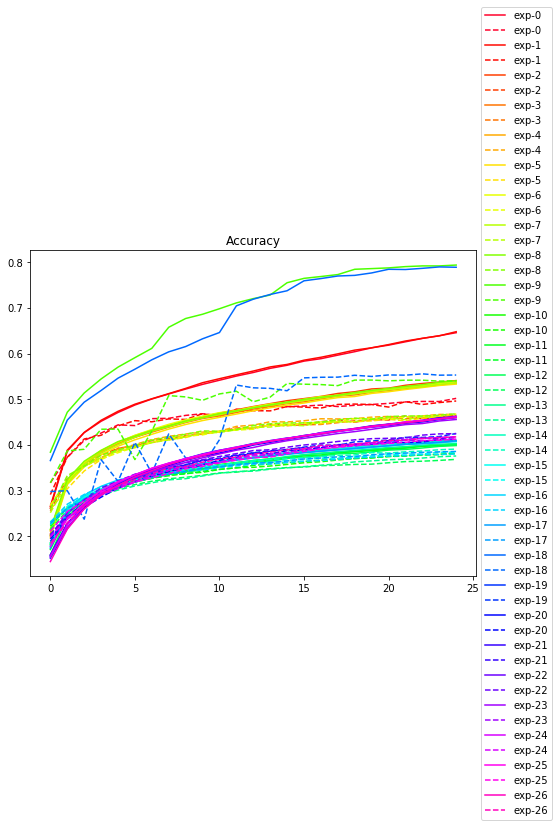

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()